# Generate Synthetic Data

In [18]:
#Synthetic data
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [173]:
def transform1(x):
    return x * random.randint(1,2) + random.randint(0,10)

def transform2(x):
    return x * random.randint(1,2) + random.randint(0,10)

center = 0
std_dev = 1
nb_samples = 1000000
gauss = np.random.normal(loc = center, scale = std_dev, size = nb_samples)
X = gauss * 3
Y = transform1(X)
Z = transform2(Y)

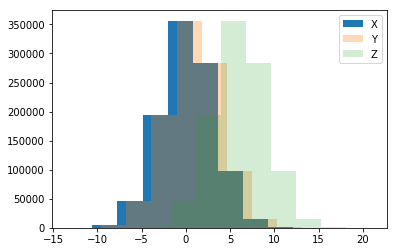

In [174]:
plt.hist(X, alpha = 1, label = 'X')
plt.hist(Y, alpha = 0.3, label = 'Y')
plt.hist(Z, alpha = 0.2, label = 'Z')

plt.legend(loc = 'upper right')
plt.show()

# Steps
### 1) Use various ml algorithms to predict Z* given X, Y
### 2) Use the PC algorithm on each to vizualize a graph.

In [175]:
from pcalg import *

import networkx as nx
import numpy as np
from gsq.ci_tests import ci_test_bin, ci_test_dis
from gsq.gsq_testdata import bin_data, dis_data

dm = np.array(bin_data).reshape((5000, 5))
X = X.astype(int)
Y = Y.astype(int)
Z = Z.astype(int)
dm2 = np.transpose(np.array([X,Y,Z]))
(g, sep_set) = estimate_skeleton(indep_test_func=ci_test_dis,
                                 data_matrix=dm2,
                                 alpha=0.01)
g = estimate_cpdag(skel_graph=g, sep_set=sep_set)
g_answer = nx.DiGraph()
g_answer.add_nodes_from([0, 1, 2])
g_answer.add_edges_from([(0, 1), (1,2)])
print('Edges are:', g.edges(), end='')
if nx.is_isomorphic(g, g_answer):
    print(' => GOOD')
else:
    print(' => WRONG')
    print('True edges should be:', g_answer.edges())



Edges are: [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)] => WRONG
True edges should be: [(0, 1), (1, 2)]


In [164]:
X

array([ 1.64915677, -2.08951695,  3.80626961, ...,  0.06143337,
        2.23709124,  1.14097728])

In [176]:
dm = np.array(dis_data).reshape((10000, 5))
(g, sep_set) = estimate_skeleton(indep_test_func=ci_test_dis,
                             data_matrix=dm,
                             alpha=0.01,
                             levels=[3,2,3,4,2])
g = estimate_cpdag(skel_graph=g, sep_set=sep_set)
g_answer = nx.DiGraph()
g_answer.add_nodes_from([0, 1, 2, 3, 4])
g_answer.add_edges_from([(0, 2), (1, 2), (1, 3), (4, 3)])
print('Edges are:', g.edges(), end='')
if nx.is_isomorphic(g, g_answer):
    print(' => GOOD')
else:
    print(' => WRONG')
    print('True edges should be:', g_answer.edges())


Edges are: [(0, 2), (1, 2), (1, 3), (4, 3)] => GOOD
